# Spatial Analysis of master_gdf

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt

from sklearn import preprocessing
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

# Configure Notebook
%matplotlib inline
plt.style.use('fivethirtyeight')
sns.set_context("notebook")
import warnings
warnings.filterwarnings('ignore')

In [2]:
!pip install folium

# Import Data

In [3]:
master_gdf = pd.read_csv('master_gdf.csv')
master_gdf.head()

,ACCNUM,YEAR,DATE,TIME,collision_datetime,STREET1,STREET2,OFFSET,ROAD_CLASS,DISTRICT,...,hourly_ex_peds,hourly_wx_peds,hourly_nx_bike,hourly_sx_bike,hourly_ex_bike,hourly_wx_bike,hourly_nx_other,hourly_sx_other,hourly_ex_other,hourly_wx_other
0,1237939,2011.0,2011-03-09,726,2011-03-09 07:26:00,COLLEGE Stre,BATHURST Stre,None,Major Arterial,Toronto and East York,...,208.0,160.0,50.0,2.0,43.0,312.0,0.0,0.0,0.0,0.0
1,1232522,2011.0,2011-03-09,1145,2011-03-09 11:45:00,JANE ST,ST JOHNS RD,None,Major Arterial,Toronto and East York,...,59.0,36.0,0.0,2.0,5.0,0.0,0.0,0.0,0.0,0.0
2,1232522,2011.0,2011-03-09,1145,2011-03-09 11:45:00,JANE ST,ST JOHNS RD,None,Major Arterial,Toronto and East York,...,59.0,36.0,0.0,2.0,5.0,0.0,0.0,0.0,0.0,0.0
3,1232522,2011.0,2011-03-09,1145,2011-03-09 11:45:00,JANE ST,ST JOHNS RD,None,Major Arterial,Toronto and East York,...,59.0,36.0,0.0,2.0,5.0,0.0,0.0,0.0,0.0,0.0
4,1222866,2011.0,2011-03-12,1917,2011-03-12 19:17:00,CHURCH ST,GOULD ST,None,Minor Arterial,Toronto and East York,...,222.0,97.0,106.0,27.0,31.0,9.0,0.0,0.0,0.0,0.0


In [4]:
master_gdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8217 entries, 0 to 8216
Columns: 152 entries, ACCNUM to hourly_wx_other
dtypes: float64(98), int64(1), object(53)
memory usage: 9.5+ MB


Question being answered: What areas in Toronto have a high concentration of motor vehicle collisions resulting in fatalities or serious injuries?

Visualizations:
- Heatmap of Collisions: Create a heatmap to visualize the spatial distribution of collisions. This can help identify areas with high concentrations.
- Bar Chart of Fatalities and Injuries: Compare the number of fatalities and serious injuries across different areas or neighborhoods.


Code Analysis:
- Calculate Collision Density: Use geographical analysis to calculate collision density per unit area. This can be achieved using clustering algorithms or spatial analysis techniques.


# Visualizations: Collisions Throughout Toronto

In [5]:
import folium
from folium import Marker
from folium.plugins import MarkerCluster

In [6]:
from shapely import wkt

# Convert 'count_geometry' column to Shapely Point geometries
master_gdf['count_geometry'] = master_gdf['count_geometry'].apply(lambda x: wkt.loads(x))

# Initialize the map centered at Toronto
toronto_map = folium.Map(location=[43.65107, -79.347015], zoom_start=11)

# Create MarkerCluster object
marker_cluster = MarkerCluster().add_to(toronto_map)

# Iterate through the dataframe to add markers to the MarkerCluster
for idx, row in master_gdf.iterrows():
    folium.Marker([row['count_geometry'].y, row['count_geometry'].x]).add_to(marker_cluster)

# Display the map
toronto_map

In [7]:
from folium.plugins import HeatMap

# Initialize a new map centered at Toronto
heatmap_toronto_map = folium.Map(location=[43.65107, -79.347015], zoom_start=11)

# Extracting coordinates for HeatMap
heat_data = [[point.y, point.x] for point in master_gdf['count_geometry']]

# Create HeatMap
HeatMap(heat_data).add_to(heatmap_toronto_map)

# Display the heatmap map
heatmap_toronto_map

In [8]:
unique_acclass = master_gdf['ACCLASS'].unique()
unique_acclass

array(['Non-Fatal Injury', 'Fatal', 'Property Damage Only', 'None'],
      dtype=object)

In [9]:
unique_wards = master_gdf['WARDNUM'].unique()
unique_wards

array([1.1000000e+01, 4.0000000e+00, 1.3000000e+01, 1.0000000e+01,
       9.0000000e+00, 2.4000000e+01, 2.5000000e+01, 2.0000000e+00,
       3.0000000e+00, 1.1100000e+03, 7.0000000e+00, 8.0000000e+00,
       1.8000000e+01, 2.3000000e+01, 6.0000000e+00, 1.0000000e+00,
       1.1130000e+03, 2.3240000e+03, 1.9000000e+01, 1.0130000e+03,
       1.6000000e+01, 5.0000000e+00, 2.0000000e+01, 2.1240000e+03,
       8.1500000e+02, 2.2000000e+01, 8.1200000e+02, 1.4000000e+01,
       1.1101300e+05, 1.7220000e+03, 2.1000000e+01, 1.6210000e+03,
       1.2110000e+03, 6.1800000e+02, 1.2000000e+01, 1.5000000e+01,
       9.1200000e+02, 7.6000000e+01, 2.3250000e+03, 2.2230000e+03,
       1.4190000e+03, 9.1100000e+02, 1.7000000e+01, 5.9000000e+01,
       1.8170000e+03, 2.1200000e+03, 4.9100000e+03, 1.1150000e+03,
       4.1000000e+02, 9.1110000e+04, 1.6200000e+03, 1.5160000e+03,
       1.6192000e+05, 2.4250000e+03, 1.9200000e+03, 1.0140000e+03,
       9.1000000e+02, 2.0240000e+03, 2.1230000e+03, 1.2150000e

In [10]:
unique_districts = master_gdf['DISTRICT'].unique()
unique_districts

array(['Toronto and East York', 'Scarborough', 'Etobicoke York',
       'North York', 'None', 'Toronto East York'], dtype=object)

In [11]:
unique_neighbourhoods = master_gdf['NEIGHBOURHOOD_158'].unique()
unique_neighbourhoods

array(['Kensington-Chinatown', 'Runnymede-Bloor West Village',
       'Downtown Yonge East', 'Church-Wellesley', 'Moss Park',
       'Rosedale-Moore Park', 'Yonge-Bay Corridor',
       'Corso Italia-Davenport', 'Scarborough Village', 'Malvern East',
       'Eringate-Centennial-West Deane', 'Etobicoke City Centre',
       'Little Portugal', 'Humbermede', 'Englemount-Lawrence',
       'Pelmo Park-Humberlea', 'Cabbagetown-South St.James Town',
       'Newtonbrook East', 'Morningside Heights',
       'Oakdale-Beverley Heights', 'West Humber-Clairville',
       'Woburn North', 'Annex', 'Woodbine Corridor', 'Rexdale-Kipling',
       'Mimico-Queensway', 'Victoria Village', 'Junction Area',
       'Dovercourt Village', 'St Lawrence-East Bayfront-The Islands',
       'Cliffcrest', 'Rockcliffe-Smythe',
       'Mount Olive-Silverstone-Jamestown', 'St.Andrew-Windfields',
       'Bridle Path-Sunnybrook-York Mills', 'Markland Wood',
       'Brookhaven-Amesbury', 'Junction-Wallace Emerson',
       'W

# Visualizations: Collision Classification Types Per District

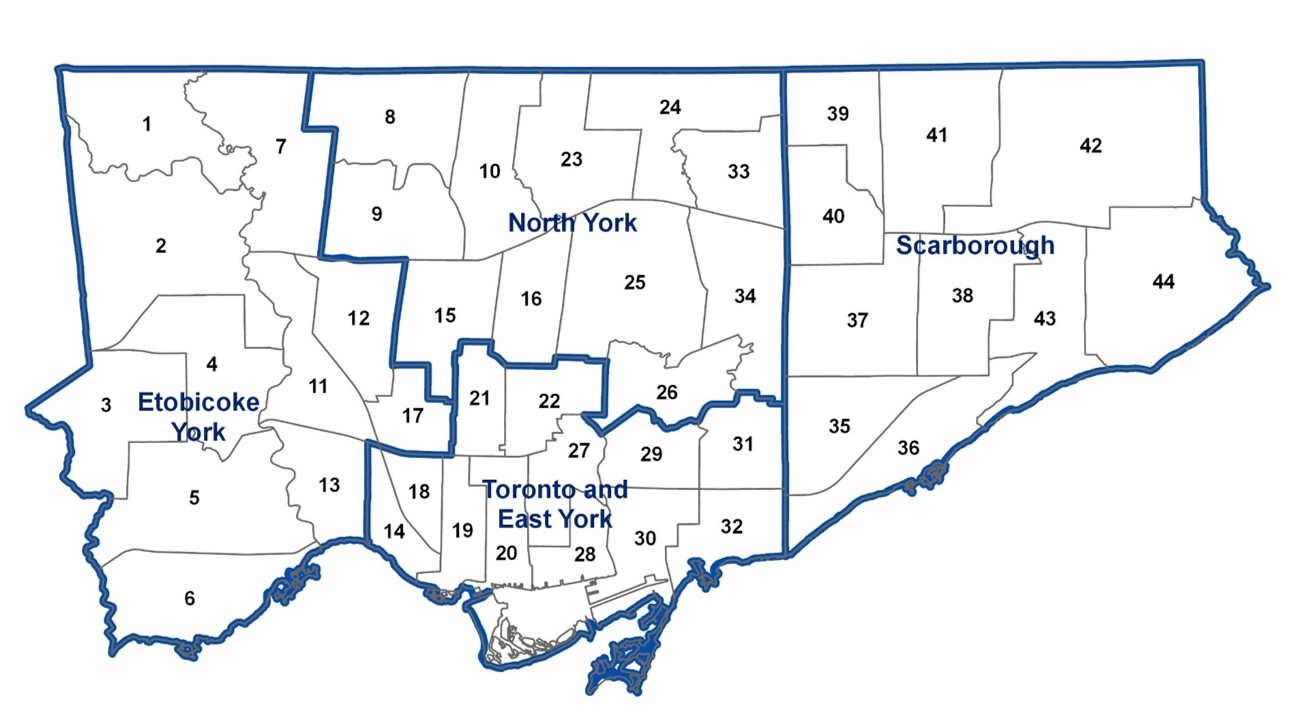

In [12]:
from IPython.display import Image

Image(filename='toronto_districts.jpg')

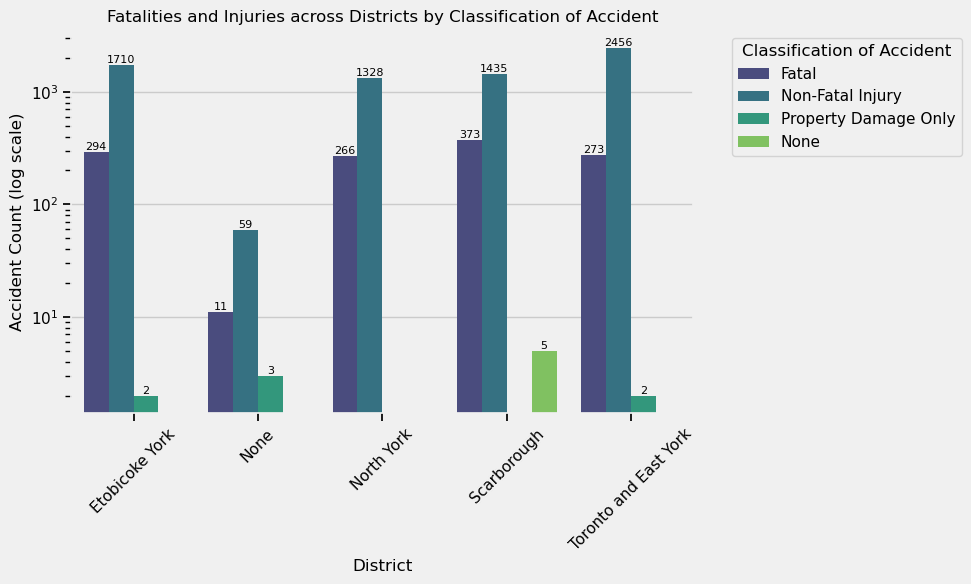

In [13]:
# Merge 'Toronto and East York' and 'Toronto East York' into a single category
master_gdf['DISTRICT'].replace({'Toronto East York': 'Toronto and East York'}, inplace=True)

# Group the data by 'DISTRICT' and 'ACCLASS', and calculate counts
grouped_data = master_gdf.groupby(['DISTRICT', 'ACCLASS']).size().reset_index(name='Count')

# Plotting a grouped bar plot with annotations
plt.figure(figsize=(10, 6))
sns.barplot(x='DISTRICT', y='Count', hue='ACCLASS', data=grouped_data, palette='viridis')

# Replace NaN values in 'Count' column with zeros
grouped_data['Count'].fillna(0, inplace=True)

# Annotate the bars with count numbers
for p in plt.gca().patches:
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    if not pd.isnull(y):
        plt.text(x, y, f'{int(y)}', ha='center', va='bottom', fontsize=8)  # Adjust the fontsize as desired

# Set logarithmic scale for y-axis
plt.yscale('log')

# Place the legend outside the plot area
plt.legend(title='Classification of Accident', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title('Fatalities and Injuries across Districts by Classification of Accident')
plt.xlabel('District')
plt.ylabel('Accident Count (log scale)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [14]:
# Pivot the grouped data to get a table view
table_view = grouped_data.pivot(index='DISTRICT', columns='ACCLASS', values='Count').fillna(0)

# Convert values to integers and move 'None' column to the end
table_view = table_view.astype(int)
table_view = table_view[[col for col in table_view.columns if col != 'None'] + ['None']]

# Style the table with a different color gradient
def color_negative_red(val):
    color = 'red' if val > table_view.values.mean() else 'green'
    return f'color: {color}'

styled_table = table_view.style.applymap(color_negative_red) \
    .set_caption('Accident Counts by District and Classification') \
    .set_table_styles([{
        'selector': 'caption',
        'props': [
            ('color', 'blue'),
            ('font-size', '18px')
        ]
    }])

# Set column widths to evenly spaced
styled_table.set_table_styles([{
    'selector': 'td',
    'props': [('width', '50px')]
}])

# Display the styled table
styled_table

ACCLASS,Fatal,Non-Fatal Injury,Property Damage Only,None
DISTRICT,,,,
Etobicoke York,294,1710,2,0
None,11,59,3,0
North York,266,1328,0,0
Scarborough,373,1435,0,5
Toronto and East York,273,2456,2,0


In [15]:
# Calculate total counts per district and add as a 'Total' column
table_view['TOTAL'] = table_view.sum(axis=1)

# Style the table with a different color gradient
def color_negative_red(val):
    color = 'red' if val > table_view['TOTAL'].mean() else 'green'
    return f'color: {color}'

styled_table = table_view.style.applymap(color_negative_red) \
    .set_caption('Accident Counts by District and Classification') \
    .set_table_styles([{
        'selector': 'caption',
        'props': [
            ('color', 'blue'),
            ('font-size', '18px')
        ]
    }])

# Set column widths to evenly spaced
styled_table.set_table_styles([{
    'selector': 'td',
    'props': [('width', '50px')]
}])

# Display the styled table
styled_table

ACCLASS,Fatal,Non-Fatal Injury,Property Damage Only,None,TOTAL
DISTRICT,,,,,
Etobicoke York,294,1710,2,0,2006
None,11,59,3,0,73
North York,266,1328,0,0,1594
Scarborough,373,1435,0,5,1813
Toronto and East York,273,2456,2,0,2731


# Now break it down --> Wards

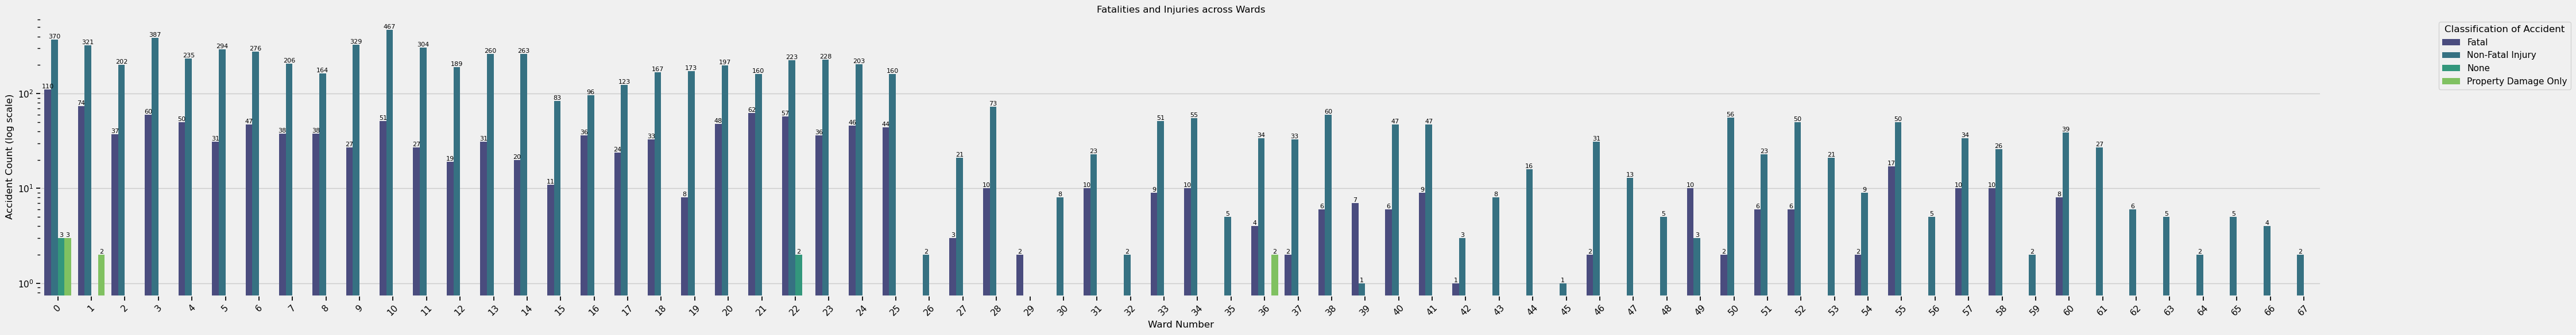

In [16]:
import matplotlib.ticker as ticker

# Group the data by 'WARDNUM' and 'ACCLASS', and calculate counts
grouped_data_1 = master_gdf.groupby(['WARDNUM', 'ACCLASS']).size().reset_index(name='Count')

# Set the figure size
plt.figure(figsize=(45, 6))

# Create the bar plot
ax = sns.barplot(x='WARDNUM', y='Count', hue='ACCLASS', data=grouped_data_1, palette='viridis')

# Replace NaN values in 'Count' column with zeros
grouped_data_1['Count'].fillna(0, inplace=True)

# Annotate the bars with count numbers
for p in ax.patches:
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    if not pd.isnull(y):
        plt.text(x, y, f'{int(y)}', ha='center', va='bottom', fontsize=8)  # Adjust the fontsize as desired

# Set logarithmic scale for y-axis
plt.yscale('log')

# Place the legend outside the plot area
plt.legend(title='Classification of Accident', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title('Fatalities and Injuries across Wards')
plt.xlabel('Ward Number')
plt.ylabel('Accident Count (log scale)')

# Format x-axis ticks as integers
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.0f}"))

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [17]:
# Group the data by 'WARDNUM' and calculate counts
ward_collisions = master_gdf['WARDNUM'].value_counts().reset_index()
ward_collisions.columns = ['WARDNUM', 'Collision_Count']
ward_collisions['WARDNUM'] = ward_collisions['WARDNUM'].astype(int)

# Sort the wards by collision count in descending order
ward_collisions = ward_collisions.sort_values(by='Collision_Count', ascending=False)

# Select wards with the most collisions (top 10)
top_wards = ward_collisions.head(10)  # Display the top 10 wards

# Display the DataFrame with wards having the most collisions
top_wards

,WARDNUM,Collision_Count
0,10,518
1,0,486
2,3,447
3,1,397
4,9,356
5,11,331
6,5,325
7,6,323
8,13,291
9,4,285


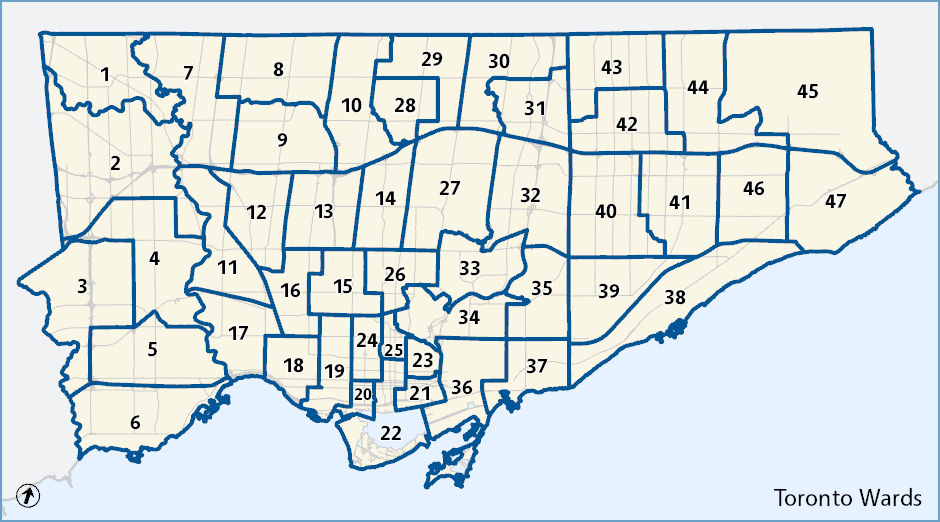

In [18]:
Image(filename='toronto_wards.jpg')

# ...Let's do it by neighborhoods

In [19]:
# Group the data by 'NEIGHBOURHOOD_158' and calculate counts
neighborhood_collisions = master_gdf['NEIGHBOURHOOD_158'].value_counts().reset_index()
neighborhood_collisions.columns = ['NEIGHBOURHOOD_158', 'Collision_Count']

# Sort the neighborhoods by collision count in descending order
neighborhood_collisions = neighborhood_collisions.sort_values(by='Collision_Count', ascending=False)

# Select neighborhoods with the most collisions (top 10, for example)
top_neighborhoods = neighborhood_collisions.head(10)

# Display the DataFrame with neighborhoods having the most collisions
top_neighborhoods

,NEIGHBOURHOOD_158,Collision_Count
0,West Humber-Clairville,245
1,Yonge-Bay Corridor,200
2,St Lawrence-East Bayfront-The Islands,157
3,South Riverdale,147
4,Wexford/Maryvale,138
5,Moss Park,130
6,Clairlea-Birchmount,128
7,Milliken,127
8,Morningside Heights,126
9,South Parkdale,118


# Question being answered: What areas in Toronto have a high concentration of motor vehicle collisions resulting in fatalities or serious injuries?

In [20]:
# Group the data by 'NEIGHBOURHOOD_158' and 'ACCLASS' and calculate counts
neighborhood_acclass_collisions = master_gdf.groupby(['NEIGHBOURHOOD_158', 'ACCLASS']).size().reset_index(name='Collision_Count')

# Pivot the table to have ACCLASS as columns
neighborhood_acclass_collisions_pivot = neighborhood_acclass_collisions.pivot(
    index='NEIGHBOURHOOD_158', columns='ACCLASS', values='Collision_Count').fillna(0).astype(int).reset_index()

# Sum up all types of collisions per neighborhood
neighborhood_acclass_collisions_pivot['Total_Collisions'] = neighborhood_acclass_collisions_pivot.sum(axis=1)

# Display the DataFrame with neighborhoods having the most collisions and ACCLASS breakdown
top_neighborhoods = neighborhood_acclass_collisions_pivot.sort_values(by='Total_Collisions', ascending=False).head(10)

#reset the index
top_neighborhoods.reset_index(drop=True, inplace=True)

top_neighborhoods

ACCLASS,NEIGHBOURHOOD_158,Fatal,Non-Fatal Injury,None,Property Damage Only,Total_Collisions
0,West Humber-Clairville,53,192,0,0,245
1,Yonge-Bay Corridor,22,178,0,0,200
2,St Lawrence-East Bayfront-The Islands,31,126,0,0,157
3,South Riverdale,10,137,0,0,147
4,Wexford/Maryvale,25,113,0,0,138
5,Moss Park,19,111,0,0,130
6,Clairlea-Birchmount,28,97,3,0,128
7,Milliken,32,95,0,0,127
8,Morningside Heights,20,106,0,0,126
9,South Parkdale,27,91,0,0,118


# Calculate Collision Density: Use geographical analysis to calculate collision density per unit area. This can be achieved using clustering algorithms or spatial analysis techniques.

In [21]:
toronto_land_area_kmsq = 630

total_collisions = len(master_gdf)

# Calculate collision density per unit area
collision_density = total_collisions / toronto_land_area_kmsq

print(f'Collision density per square kilometer area: {collision_density:.6f} collisions per square kilometer area')

Collision density per square kilometer area: 13.042857 collisions per square kilometer area


# Do ratios of Accidents/Volumes for Districts & Neighborhoods

# Worst Intersections (collisions : average traffic)

In [22]:
#create daily and average total traffic columns per row
daily_traffic = [
    'daily_sb_cars_r', 'daily_sb_cars_t', 'daily_sb_cars_l', 
    'daily_nb_cars_r', 'daily_nb_cars_t', 'daily_nb_cars_l', 
    'daily_wb_cars_r', 'daily_wb_cars_t', 'daily_wb_cars_l', 
    'daily_eb_cars_r', 'daily_eb_cars_t', 'daily_eb_cars_l', 
    'daily_sb_truck_r', 'daily_sb_truck_t', 'daily_sb_truck_l', 
    'daily_nb_truck_r', 'daily_nb_truck_t', 'daily_nb_truck_l', 
    'daily_wb_truck_r', 'daily_wb_truck_t', 'daily_wb_truck_l', 
    'daily_eb_truck_r', 'daily_eb_truck_t', 'daily_eb_truck_l', 
    'daily_sb_bus_r', 'daily_sb_bus_t', 'daily_sb_bus_l', 
    'daily_nb_bus_r', 'daily_nb_bus_t', 'daily_nb_bus_l', 
    'daily_wb_bus_r', 'daily_wb_bus_t', 'daily_wb_bus_l', 
    'daily_eb_bus_r', 'daily_eb_bus_t', 'daily_eb_bus_l', 
    'daily_nx_peds', 'daily_sx_peds', 'daily_ex_peds', 'daily_wx_peds', 
    'daily_nx_bike', 'daily_sx_bike', 'daily_ex_bike', 'daily_wx_bike', 
    'daily_nx_other', 'daily_sx_other', 'daily_ex_other', 'daily_wx_other'
]

hourly_traffic = [ 'hourly_sb_cars_r', 'hourly_sb_cars_t', 'hourly_sb_cars_l',
    'hourly_nb_cars_r', 'hourly_nb_cars_t', 'hourly_nb_cars_l',
    'hourly_wb_cars_r', 'hourly_wb_cars_t', 'hourly_wb_cars_l',
    'hourly_eb_cars_r', 'hourly_eb_cars_t', 'hourly_eb_cars_l',
    'hourly_sb_truck_r', 'hourly_sb_truck_t', 'hourly_sb_truck_l',
    'hourly_nb_truck_r', 'hourly_nb_truck_t', 'hourly_nb_truck_l',
    'hourly_wb_truck_r', 'hourly_wb_truck_t', 'hourly_wb_truck_l',
    'hourly_eb_truck_r', 'hourly_eb_truck_t', 'hourly_eb_truck_l',
    'hourly_sb_bus_r', 'hourly_sb_bus_t', 'hourly_sb_bus_l',
    'hourly_nb_bus_r', 'hourly_nb_bus_t', 'hourly_nb_bus_l',
    'hourly_wb_bus_r', 'hourly_wb_bus_t', 'hourly_wb_bus_l',
    'hourly_eb_bus_r', 'hourly_eb_bus_t', 'hourly_eb_bus_l',
    'hourly_nx_peds', 'hourly_sx_peds', 'hourly_ex_peds', 'hourly_wx_peds',
    'hourly_nx_bike', 'hourly_sx_bike', 'hourly_ex_bike', 'hourly_wx_bike',
    'hourly_nx_other', 'hourly_sx_other', 'hourly_ex_other', 'hourly_wx_other'
]

#make a new dataframe to prevent overwriting
master_gdf_totals = master_gdf

# Sum the columns along axis=1 to get the total for each row
master_gdf_totals['total_daily_traffic'] = master_gdf[daily_traffic].sum(axis=1)
master_gdf_totals['total_hourly_traffic'] = master_gdf[hourly_traffic].sum(axis=1)

master_gdf_totals

,ACCNUM,YEAR,DATE,TIME,collision_datetime,STREET1,STREET2,OFFSET,ROAD_CLASS,DISTRICT,...,hourly_nx_bike,hourly_sx_bike,hourly_ex_bike,hourly_wx_bike,hourly_nx_other,hourly_sx_other,hourly_ex_other,hourly_wx_other,total_daily_traffic,total_hourly_traffic
0,1237939,2011.0,2011-03-09,726,2011-03-09 07:26:00,COLLEGE Stre,BATHURST Stre,None,Major Arterial,Toronto and East York,...,50.0,2.0,43.0,312.0,0.0,0.0,0.0,0.0,31134.0,4803.0
1,1232522,2011.0,2011-03-09,1145,2011-03-09 11:45:00,JANE ST,ST JOHNS RD,None,Major Arterial,Toronto and East York,...,0.0,2.0,5.0,0.0,0.0,0.0,0.0,0.0,12358.0,2413.0
2,1232522,2011.0,2011-03-09,1145,2011-03-09 11:45:00,JANE ST,ST JOHNS RD,None,Major Arterial,Toronto and East York,...,0.0,2.0,5.0,0.0,0.0,0.0,0.0,0.0,12358.0,2413.0
3,1232522,2011.0,2011-03-09,1145,2011-03-09 11:45:00,JANE ST,ST JOHNS RD,None,Major Arterial,Toronto and East York,...,0.0,2.0,5.0,0.0,0.0,0.0,0.0,0.0,12358.0,2413.0
4,1222866,2011.0,2011-03-12,1917,2011-03-12 19:17:00,CHURCH ST,GOULD ST,None,Minor Arterial,Toronto and East York,...,106.0,27.0,31.0,9.0,0.0,0.0,0.0,0.0,15535.0,2015.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8212,2002494669,2022.0,2022-12-21,1750,2022-12-21 17:50:00,GLOUCESTER GRV,WINNETT AVE,None,Local,None,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2729.0,156.0
8213,2002494669,2022.0,2022-12-21,1750,2022-12-21 17:50:00,GLOUCESTER GRV,WINNETT AVE,None,Local,None,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2729.0,156.0
8214,2002494669,2022.0,2022-12-21,1750,2022-12-21 17:50:00,GLOUCESTER GRV,WINNETT AVE,None,Local,None,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2729.0,156.0
8215,2002556621,2022.0,2022-12-30,2234,2022-12-30 22:34:00,BLOOR ST W,MONTROSE AVE,76 m West of,Major Arterial,Toronto and East York,...,0.0,12.0,125.0,120.0,0.0,0.0,0.0,0.0,10827.0,835.0


In [23]:
traffic_averages = master_gdf_totals.groupby('count_location')[['total_daily_traffic', 'total_hourly_traffic']].mean()
traffic_averages.columns = ['average_daily_traffic', 'average_hourly_traffic']

traffic_averages

,average_daily_traffic,average_hourly_traffic
count_location,,
# 1645 SHEPPARD AVE AT DOWNSVIEW DELL PARK / HINCKS DELLCREST CTR,15771.0,1350.000
# 3030 BIRCHMOUNT RD AT BIRCHMOUNT RD (NORTH DRIVEWAY),10784.0,2434.000
# 4400 DUFFERIN ST AT DUFFERIN ST & 250M N STANSTEAD DR (PX 1625),42242.0,915.000
1630 LAWRENCE AVE W AT 55M E OF OLYMPIA DR (PX 1624),18898.0,1535.000
3410 MIDLAND AVE,12834.0,1219.125
...,...,...
YONGE ST AT ORCHARD VIEW BLVD & ROEHAMPTON AVE (PX 2144),18527.0,2913.000
YONGE ST AT SHAFTESBURY AVE,11936.0,1496.000
YONGE ST AT WILSON AVE & YORK MILLS RD,37163.0,6491.000


In [24]:
collisions_intersection = master_gdf_totals['count_location'].value_counts().reset_index()
collisions_intersection.columns = ['count_location', 'Collision_Count']
collisions_intersection

,count_location,Collision_Count
0,LAKE SHORE BLVD AT LOWER JARVIS ST (PX 210),33
1,KEELE ST AT SHEPPARD AVE W,27
2,DON RDWY AT LAKE SHORE BLVD (PX 208),23
3,HIGHWAY 27 AT STEELES AVE W,23
4,BATHURST ST AT LAKE SHORE BLVD W (PX 216),23
...,...,...
1696,DOLOMITE DR AT DUFFERIN ST (PX 1196),1
1697,LAWRENCE AVE AT PIMLICO RD (PX 1656),1
1698,HERONS HILL WAY AT YORKLAND RD (PX 184),1
1699,NEWARK RD AT SCARBOROUGH GOLF CLUB RD,1


# Highest No. of Collisions per Intersection

In [25]:
collisions_intersection.head(10)

,count_location,Collision_Count
0,LAKE SHORE BLVD AT LOWER JARVIS ST (PX 210),33
1,KEELE ST AT SHEPPARD AVE W,27
2,DON RDWY AT LAKE SHORE BLVD (PX 208),23
3,HIGHWAY 27 AT STEELES AVE W,23
4,BATHURST ST AT LAKE SHORE BLVD W (PX 216),23
5,BAY ST AT LAKE SHORE BLVD W (PX 212),22
6,LAWRENCE AVE E AT RAILSIDE RD W & UNDERHILL DR,22
7,BROOKMERE RD AT KIPLING AVE & WESTHUMBER BLVD ...,22
8,EVANS AVE AT ISLINGTON AVE (PX 775),21
9,FINCH AVE AT ISLINGTON AVE (PX 947),21


In [26]:
# Merge two DataFrames on a common column
collision_to_volume = pd.merge(collisions_intersection, traffic_averages, on='count_location')

collision_to_volume['daily_ratio'] = collision_to_volume['Collision_Count'] / collision_to_volume['average_daily_traffic']
collision_to_volume['hourly_ratio'] = collision_to_volume['Collision_Count'] / collision_to_volume['average_hourly_traffic']

# Display the merged DataFrame
collision_to_volume.head(10)

,count_location,Collision_Count,average_daily_traffic,average_hourly_traffic,daily_ratio,hourly_ratio
0,LAKE SHORE BLVD AT LOWER JARVIS ST (PX 210),33,28095.363636,3358.515152,0.001175,0.009826
1,KEELE ST AT SHEPPARD AVE W,27,26611.666667,3896.666667,0.001015,0.006929
2,DON RDWY AT LAKE SHORE BLVD (PX 208),23,13330.478261,2308.565217,0.001725,0.009963
3,HIGHWAY 27 AT STEELES AVE W,23,26305.869565,2481.826087,0.000874,0.009267
4,BATHURST ST AT LAKE SHORE BLVD W (PX 216),23,26457.478261,3157.217391,0.000869,0.007285
5,BAY ST AT LAKE SHORE BLVD W (PX 212),22,30629.000000,2702.000000,0.000718,0.008142
6,LAWRENCE AVE E AT RAILSIDE RD W & UNDERHILL DR,22,33684.000000,5937.000000,0.000653,0.003706
7,BROOKMERE RD AT KIPLING AVE & WESTHUMBER BLVD ...,22,10932.000000,1306.954545,0.002012,0.016833
8,EVANS AVE AT ISLINGTON AVE (PX 775),21,17877.000000,1393.380952,0.001175,0.015071
9,FINCH AVE AT ISLINGTON AVE (PX 947),21,25436.000000,1845.000000,0.000826,0.011382


# Sorted by Daily Ratio (AVG TRAFFIC)

In [27]:
collision_to_volume = collision_to_volume.sort_values(by='daily_ratio', ascending=False).head(10)
collision_to_volume

,count_location,Collision_Count,average_daily_traffic,average_hourly_traffic,daily_ratio,hourly_ratio
165,MOUNT ROYAL AVE AT REGAL RD,10,703.0,115.0,0.014225,0.086957
1022,AMSTERDAM AVE AT GLENBURN AVE,3,499.0,10.0,0.006012,0.300000
328,CLIFFSIDE DR AT EAST HAVEN DR,7,1463.0,190.0,0.004785,0.036842
1434,ALLEN AVE AT QUEENS AVE,2,462.0,70.0,0.004329,0.028571
898,ARCADE DR AT CHAPMAN RD,3,843.0,122.0,0.003559,0.024590
1415,SNOWCREST AVE AT UNICORN AVE (WEST LEG),2,639.0,273.0,0.003130,0.007326
1483,CEDARVALE AVE AT SAVOY AVE,2,643.0,130.0,0.003110,0.015385
1635,BOTHAM RD AT STUART AVE & STUART CRES,2,690.0,116.0,0.002899,0.017241
1390,EPSOM AVE AT WESTLAKE AVE,2,717.0,48.0,0.002789,0.041667
1628,MAXWELL ST AT WATERLOO AVE,2,783.0,172.0,0.002554,0.011628


# Sorted by Hourly Ratio (AVG TRAFFIC)

In [28]:
collision_to_volume = collision_to_volume.sort_values(by='hourly_ratio', ascending=False).head(10)
collision_to_volume

,count_location,Collision_Count,average_daily_traffic,average_hourly_traffic,daily_ratio,hourly_ratio
1022,AMSTERDAM AVE AT GLENBURN AVE,3,499.0,10.0,0.006012,0.300000
165,MOUNT ROYAL AVE AT REGAL RD,10,703.0,115.0,0.014225,0.086957
1390,EPSOM AVE AT WESTLAKE AVE,2,717.0,48.0,0.002789,0.041667
328,CLIFFSIDE DR AT EAST HAVEN DR,7,1463.0,190.0,0.004785,0.036842
1434,ALLEN AVE AT QUEENS AVE,2,462.0,70.0,0.004329,0.028571
898,ARCADE DR AT CHAPMAN RD,3,843.0,122.0,0.003559,0.024590
1635,BOTHAM RD AT STUART AVE & STUART CRES,2,690.0,116.0,0.002899,0.017241
1483,CEDARVALE AVE AT SAVOY AVE,2,643.0,130.0,0.003110,0.015385
1628,MAXWELL ST AT WATERLOO AVE,2,783.0,172.0,0.002554,0.011628
1415,SNOWCREST AVE AT UNICORN AVE (WEST LEG),2,639.0,273.0,0.003130,0.007326


# # Collisions / Total Traffic

In [29]:
traffic_sums = master_gdf_totals.groupby('count_location')[['total_daily_traffic', 'total_hourly_traffic']].sum()
traffic_sums

,total_daily_traffic,total_hourly_traffic
count_location,,
# 1645 SHEPPARD AVE AT DOWNSVIEW DELL PARK / HINCKS DELLCREST CTR,31542.0,2700.0
# 3030 BIRCHMOUNT RD AT BIRCHMOUNT RD (NORTH DRIVEWAY),32352.0,7302.0
# 4400 DUFFERIN ST AT DUFFERIN ST & 250M N STANSTEAD DR (PX 1625),126726.0,2745.0
1630 LAWRENCE AVE W AT 55M E OF OLYMPIA DR (PX 1624),37796.0,3070.0
3410 MIDLAND AVE,205344.0,19506.0
...,...,...
YONGE ST AT ORCHARD VIEW BLVD & ROEHAMPTON AVE (PX 2144),111162.0,17478.0
YONGE ST AT SHAFTESBURY AVE,47744.0,5984.0
YONGE ST AT WILSON AVE & YORK MILLS RD,706097.0,123329.0


In [30]:
collision_total_traffic = pd.merge(collisions_intersection, traffic_sums, on='count_location')

collision_total_traffic['daily_ratio'] = collision_total_traffic['Collision_Count'] / collision_total_traffic['total_daily_traffic']
collision_total_traffic['hourly_ratio'] = collision_total_traffic['Collision_Count'] / collision_total_traffic['total_hourly_traffic']

collision_total_traffic

,count_location,Collision_Count,total_daily_traffic,total_hourly_traffic,daily_ratio,hourly_ratio
0,LAKE SHORE BLVD AT LOWER JARVIS ST (PX 210),33,927147.0,110831.0,0.000036,0.000298
1,KEELE ST AT SHEPPARD AVE W,27,718515.0,105210.0,0.000038,0.000257
2,DON RDWY AT LAKE SHORE BLVD (PX 208),23,306601.0,53097.0,0.000075,0.000433
3,HIGHWAY 27 AT STEELES AVE W,23,605035.0,57082.0,0.000038,0.000403
4,BATHURST ST AT LAKE SHORE BLVD W (PX 216),23,608522.0,72616.0,0.000038,0.000317
...,...,...,...,...,...,...
1696,DOLOMITE DR AT DUFFERIN ST (PX 1196),1,22314.0,1239.0,0.000045,0.000807
1697,LAWRENCE AVE AT PIMLICO RD (PX 1656),1,16153.0,2500.0,0.000062,0.000400
1698,HERONS HILL WAY AT YORKLAND RD (PX 184),1,10749.0,798.0,0.000093,0.001253
1699,NEWARK RD AT SCARBOROUGH GOLF CLUB RD,1,6238.0,1043.0,0.000160,0.000959


# Sorted by Daily Ratio (TOTAL TRAFFIC)

In [31]:
total_collision_to_volume = collision_total_traffic.sort_values(by='daily_ratio', ascending=False).head(10)
total_collision_to_volume

,count_location,Collision_Count,total_daily_traffic,total_hourly_traffic,daily_ratio,hourly_ratio
1434,ALLEN AVE AT QUEENS AVE,2,924.0,140.0,0.002165,0.014286
1022,AMSTERDAM AVE AT GLENBURN AVE,3,1497.0,30.0,0.002004,0.100000
1415,SNOWCREST AVE AT UNICORN AVE (WEST LEG),2,1278.0,546.0,0.001565,0.003663
1483,CEDARVALE AVE AT SAVOY AVE,2,1286.0,260.0,0.001555,0.007692
1635,BOTHAM RD AT STUART AVE & STUART CRES,2,1380.0,232.0,0.001449,0.008621
165,MOUNT ROYAL AVE AT REGAL RD,10,7030.0,1150.0,0.001422,0.008696
1390,EPSOM AVE AT WESTLAKE AVE,2,1434.0,96.0,0.001395,0.020833
1628,MAXWELL ST AT WATERLOO AVE,2,1566.0,344.0,0.001277,0.005814
1593,LONSDALE RD AT ORIOLE PKWY,2,1602.0,412.0,0.001248,0.004854
898,ARCADE DR AT CHAPMAN RD,3,2529.0,366.0,0.001186,0.008197


# Sorted by Hourly Ratio (TOTAL TRAFFIC)

In [32]:
total_collision_to_volume = collision_total_traffic.sort_values(by='hourly_ratio', ascending=False).head(10)
total_collision_to_volume

,count_location,Collision_Count,total_daily_traffic,total_hourly_traffic,daily_ratio,hourly_ratio
1022,AMSTERDAM AVE AT GLENBURN AVE,3,1497.0,30.0,0.002004,0.100000
617,BLOOR ST W AT LANSDOWNE AVE (PX 326),5,31160.0,80.0,0.000160,0.062500
1390,EPSOM AVE AT WESTLAKE AVE,2,1434.0,96.0,0.001395,0.020833
1550,RAMP SOUTH KINGSWAY SB TO THE QUEENSWAY EB,2,1928.0,134.0,0.001037,0.014925
1434,ALLEN AVE AT QUEENS AVE,2,924.0,140.0,0.002165,0.014286
949,SORAUREN AVE AT WESTMINSTER AVE,3,8181.0,261.0,0.000367,0.011494
1580,DEARHAM WOOD AT GALLOWAY RD,2,3680.0,206.0,0.000543,0.009709
736,WOOD AVE AT LAWRENCE BAYVIEW S RAMP,4,7636.0,432.0,0.000524,0.009259
918,RAMP SOUTH KINGSWAY SB TO THE QUEENSWAY WB,3,4884.0,333.0,0.000614,0.009009
165,MOUNT ROYAL AVE AT REGAL RD,10,7030.0,1150.0,0.001422,0.008696


# Feature Engineering!!

In [33]:
intersection_r = pd.read_csv('intersection_r.csv')
intersection_r.head()

,count_location,ROAD_CLASS,TRAFFCTL,num_of_collisions,total_traffic,average_int_width,years,r
0,BATHURST ST AT COLLEGE ST (PX 300),Major Arterial,No Control,18,20083.944444,0.015,11,1.488150
1,JANE ST AT ST JOHNS RD (PX 523),Major Arterial,Traffic Signal,3,11620.000000,0.015,11,0.428685
2,CHURCH ST AT GOULD ST (PX 993),Minor Arterial,Traffic Signal,10,9440.000000,0.015,11,1.758941
3,CHARLES ST E AT CHURCH ST (PX 225),Minor Arterial,No Control,2,11585.000000,0.015,11,0.286653
4,KING ST E AT PRINCESS ST,Major Arterial,No Control,11,5304.000000,0.015,11,3.443597


In [34]:
master_with_r = pd.merge(master_gdf_totals, intersection_r, on='count_location')
master_with_r

,ACCNUM,YEAR,DATE,TIME,collision_datetime,STREET1,STREET2,OFFSET,ROAD_CLASS_x,DISTRICT,...,hourly_wx_other,total_daily_traffic,total_hourly_traffic,ROAD_CLASS_y,TRAFFCTL_y,num_of_collisions,total_traffic,average_int_width,years,r
0,1237939,2011.0,2011-03-09,726,2011-03-09 07:26:00,COLLEGE Stre,BATHURST Stre,None,Major Arterial,Toronto and East York,...,0.0,31134.0,4803.0,Major Arterial,No Control,18,20083.944444,0.015,11,1.488150
1,1237939,2011.0,2011-03-09,726,2011-03-09 07:26:00,COLLEGE Stre,BATHURST Stre,None,Major Arterial,Toronto and East York,...,0.0,31134.0,4803.0,Major Arterial,No Control,18,20083.944444,0.015,11,1.488150
2,1237939,2011.0,2011-03-09,726,2011-03-09 07:26:00,COLLEGE Stre,BATHURST Stre,None,Major Arterial,Toronto and East York,...,0.0,31134.0,4803.0,Major Arterial,No Control,18,20083.944444,0.015,11,1.488150
3,1292914,2012.0,2012-03-14,1550,2012-03-14 15:50:00,COLLEGE ST,BATHURST ST,None,Major Arterial,Toronto and East York,...,0.0,31134.0,2396.0,Major Arterial,No Control,18,20083.944444,0.015,11,1.488150
4,1292914,2012.0,2012-03-14,1550,2012-03-14 15:50:00,COLLEGE ST,BATHURST ST,None,Major Arterial,Toronto and East York,...,0.0,31134.0,2396.0,Major Arterial,No Control,18,20083.944444,0.015,11,1.488150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8212,2002494669,2022.0,2022-12-21,1750,2022-12-21 17:50:00,GLOUCESTER GRV,WINNETT AVE,None,Local,None,...,0.0,2729.0,156.0,Local,Stop Sign,5,2427.000000,0.015,11,3.420766
8213,2002494669,2022.0,2022-12-21,1750,2022-12-21 17:50:00,GLOUCESTER GRV,WINNETT AVE,None,Local,None,...,0.0,2729.0,156.0,Local,Stop Sign,5,2427.000000,0.015,11,3.420766
8214,2002494669,2022.0,2022-12-21,1750,2022-12-21 17:50:00,GLOUCESTER GRV,WINNETT AVE,None,Local,None,...,0.0,2729.0,156.0,Local,Stop Sign,5,2427.000000,0.015,11,3.420766
8215,2002556621,2022.0,2022-12-30,2234,2022-12-30 22:34:00,BLOOR ST W,MONTROSE AVE,76 m West of,Major Arterial,Toronto and East York,...,0.0,10827.0,835.0,Major Arterial,No Control,2,9535.000000,0.015,11,0.348283


In [35]:
columns_to_drop = [
    'daily_sb_cars_r', 'daily_sb_cars_t', 'daily_sb_cars_l',
    'daily_nb_cars_r', 'daily_nb_cars_t', 'daily_nb_cars_l',
    'daily_wb_cars_r', 'daily_wb_cars_t', 'daily_wb_cars_l',
    'daily_eb_cars_r', 'daily_eb_cars_t', 'daily_eb_cars_l',
    'daily_sb_truck_r', 'daily_sb_truck_t', 'daily_sb_truck_l',
    'daily_nb_truck_r', 'daily_nb_truck_t', 'daily_nb_truck_l',
    'daily_wb_truck_r', 'daily_wb_truck_t', 'daily_wb_truck_l',
    'daily_eb_truck_r', 'daily_eb_truck_t', 'daily_eb_truck_l',
    'daily_sb_bus_r', 'daily_sb_bus_t', 'daily_sb_bus_l',
    'daily_nb_bus_r', 'daily_nb_bus_t', 'daily_nb_bus_l',
    'daily_wb_bus_r', 'daily_wb_bus_t', 'daily_wb_bus_l',
    'daily_eb_bus_r', 'daily_eb_bus_t', 'daily_eb_bus_l',
    'daily_nx_peds', 'daily_sx_peds', 'daily_ex_peds', 'daily_wx_peds',
    'daily_nx_bike', 'daily_sx_bike', 'daily_ex_bike', 'daily_wx_bike',
    'daily_nx_other', 'daily_sx_other', 'daily_ex_other', 'daily_wx_other',
    'hourly_sb_cars_r', 'hourly_sb_cars_t', 'hourly_sb_cars_l',
    'hourly_nb_cars_r', 'hourly_nb_cars_t', 'hourly_nb_cars_l',
    'hourly_wb_cars_r', 'hourly_wb_cars_t', 'hourly_wb_cars_l',
    'hourly_eb_cars_r', 'hourly_eb_cars_t', 'hourly_eb_cars_l',
    'hourly_sb_truck_r', 'hourly_sb_truck_t', 'hourly_sb_truck_l',
    'hourly_nb_truck_r', 'hourly_nb_truck_t', 'hourly_nb_truck_l',
    'hourly_wb_truck_r', 'hourly_wb_truck_t', 'hourly_wb_truck_l',
    'hourly_eb_truck_r', 'hourly_eb_truck_t', 'hourly_eb_truck_l',
    'hourly_sb_bus_r', 'hourly_sb_bus_t', 'hourly_sb_bus_l',
    'hourly_nb_bus_r', 'hourly_nb_bus_t', 'hourly_nb_bus_l',
    'hourly_wb_bus_r', 'hourly_wb_bus_t', 'hourly_wb_bus_l',
    'hourly_eb_bus_r', 'hourly_eb_bus_t', 'hourly_eb_bus_l',
    'hourly_nx_peds', 'hourly_sx_peds', 'hourly_ex_peds', 'hourly_wx_peds',
    'hourly_nx_bike', 'hourly_sx_bike', 'hourly_ex_bike', 'hourly_wx_bike',
    'hourly_nx_other', 'hourly_sx_other', 'hourly_ex_other', 'hourly_wx_other',
    'num_of_collisions','total_traffic','average_int_width','years'
]

# Drop the specified columns
master_with_r.drop(columns=columns_to_drop, inplace=True)

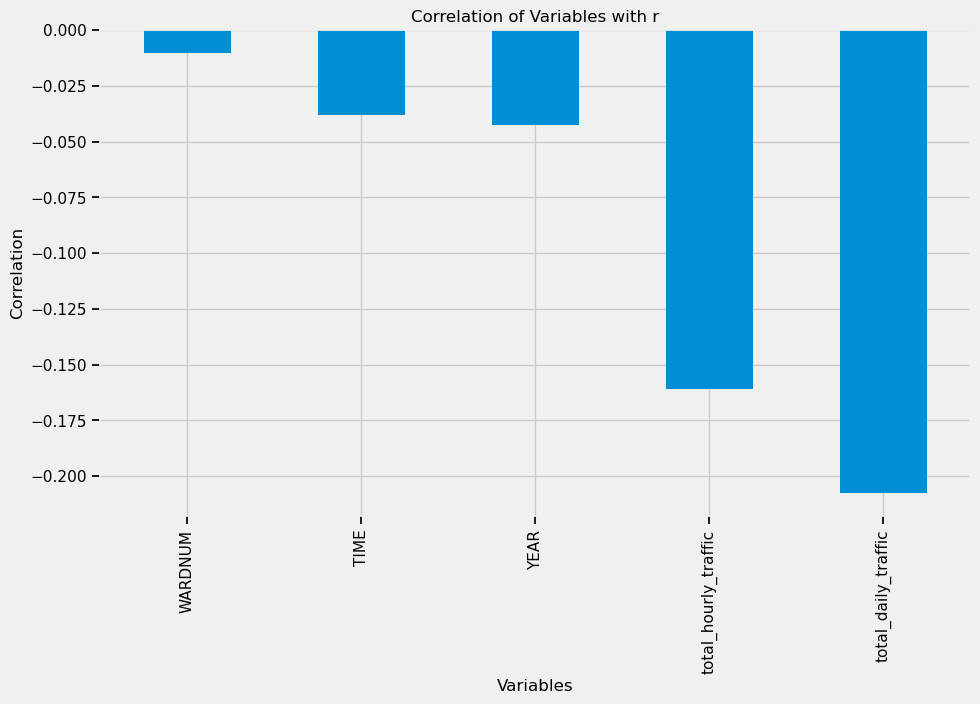

In [36]:
#calculate correlations
correlations = master_with_r.corr()['r'].drop('r')

#plotting
plt.figure(figsize=(10, 6))
correlations.sort_values(ascending=False).plot(kind='bar')
plt.title('Correlation of Variables with r')
plt.xlabel('Variables')
plt.ylabel('Correlation')
plt.show()

In [ ]:
#can't use any of the traffic volumes since its represented in the equation for r

In [37]:
master_with_r

,ACCNUM,YEAR,DATE,TIME,collision_datetime,STREET1,STREET2,OFFSET,ROAD_CLASS_x,DISTRICT,...,DIVISION,collision_geometry,count_datetime,count_location,count_geometry,total_daily_traffic,total_hourly_traffic,ROAD_CLASS_y,TRAFFCTL_y,r
0,1237939,2011.0,2011-03-09,726,2011-03-09 07:26:00,COLLEGE Stre,BATHURST Stre,None,Major Arterial,Toronto and East York,...,D14,POINT (-79.40769 43.656445),2011-06-01 08:00:00,BATHURST ST AT COLLEGE ST (PX 300),POINT (-79.4077219983631 43.6564809958047),31134.0,4803.0,Major Arterial,No Control,1.488150
1,1237939,2011.0,2011-03-09,726,2011-03-09 07:26:00,COLLEGE Stre,BATHURST Stre,None,Major Arterial,Toronto and East York,...,D14,POINT (-79.40769 43.656445),2011-06-01 08:00:00,BATHURST ST AT COLLEGE ST (PX 300),POINT (-79.4077219983631 43.6564809958047),31134.0,4803.0,Major Arterial,No Control,1.488150
2,1237939,2011.0,2011-03-09,726,2011-03-09 07:26:00,COLLEGE Stre,BATHURST Stre,None,Major Arterial,Toronto and East York,...,D14,POINT (-79.40769 43.656445),2011-06-01 08:00:00,BATHURST ST AT COLLEGE ST (PX 300),POINT (-79.4077219983631 43.6564809958047),31134.0,4803.0,Major Arterial,No Control,1.488150
3,1292914,2012.0,2012-03-14,1550,2012-03-14 15:50:00,COLLEGE ST,BATHURST ST,None,Major Arterial,Toronto and East York,...,D14,POINT (-79.40768 43.656409),2011-06-01 18:00:00,BATHURST ST AT COLLEGE ST (PX 300),POINT (-79.4077219983631 43.6564809958047),31134.0,2396.0,Major Arterial,No Control,1.488150
4,1292914,2012.0,2012-03-14,1550,2012-03-14 15:50:00,COLLEGE ST,BATHURST ST,None,Major Arterial,Toronto and East York,...,D14,POINT (-79.40768 43.656409),2011-06-01 18:00:00,BATHURST ST AT COLLEGE ST (PX 300),POINT (-79.4077219983631 43.6564809958047),31134.0,2396.0,Major Arterial,No Control,1.488150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8212,2002494669,2022.0,2022-12-21,1750,2022-12-21 17:50:00,GLOUCESTER GRV,WINNETT AVE,None,Local,None,...,D13,POINT (-79.436534 43.696864),2021-12-15 18:00:00,AVA RD AT WINNETT AVE,POINT (-79.4359754197162 43.6955080379418),2729.0,156.0,Local,Stop Sign,3.420766
8213,2002494669,2022.0,2022-12-21,1750,2022-12-21 17:50:00,GLOUCESTER GRV,WINNETT AVE,None,Local,None,...,D13,POINT (-79.436534 43.696864),2021-12-15 18:00:00,AVA RD AT WINNETT AVE,POINT (-79.4359754197162 43.6955080379418),2729.0,156.0,Local,Stop Sign,3.420766
8214,2002494669,2022.0,2022-12-21,1750,2022-12-21 17:50:00,GLOUCESTER GRV,WINNETT AVE,None,Local,None,...,D13,POINT (-79.436534 43.696864),2021-12-15 18:00:00,AVA RD AT WINNETT AVE,POINT (-79.4359754197162 43.6955080379418),2729.0,156.0,Local,Stop Sign,3.420766
8215,2002556621,2022.0,2022-12-30,2234,2022-12-30 22:34:00,BLOOR ST W,MONTROSE AVE,76 m West of,Major Arterial,Toronto and East York,...,D14,POINT (-79.421268 43.662856),2020-10-01 18:00:00,BLOOR ST AT MONTROSE AVE (PX 1928),POINT (-79.42091399636405 43.66302499672006),10827.0,835.0,Major Arterial,No Control,0.348283


# For feature engineering, we can consider NEIGHBOURHOODS or WARD NUMBERS or DISTRICTS

In [ ]:
def feature_engineering(data): 

    #ONE
    # Calculate the count of occurrences of each neighborhood as a proxy for collisions
    collisions_per_neighborhood = data['NEIGHBOURHOOD_158'].value_counts().reset_index()
    collisions_per_neighborhood.columns = ['NEIGHBOURHOOD_158', 'collisions_count']

    # Calculate total collisions for all neighborhoods
    total_collisions_all = collisions_per_neighborhood['collisions_count'].sum()

    # Compute ratio of collisions per neighborhood to total collisions of all neighborhoods
    collisions_per_neighborhood['collision_ratio_neighbourhood'] = collisions_per_neighborhood['collisions_count'] / total_collisions_all

    # Merge collision ratio information back into master_gdf
    data = data.merge(collisions_per_neighborhood[['NEIGHBOURHOOD_158', 'collision_ratio_neighbourhood']], on='NEIGHBOURHOOD_158', how='left')
    
    
    #TWO
    # Calculate the count of occurrences of each neighborhood as a proxy for collisions
    collisions_per_ward = data['WARDNUM'].value_counts().reset_index()
    collisions_per_ward.columns = ['WARDNUM', 'collisions_count']

    # Calculate total collisions for all neighborhoods
    total_collisions_wards = collisions_per_ward['collisions_count'].sum()

    # Compute ratio of collisions per neighborhood to total collisions of all neighborhoods
    collisions_per_ward['collision_ratio_ward'] = collisions_per_ward['collisions_count'] / total_collisions_wards

    # Merge collision ratio information back into master_gdf
    data = data.merge(collisions_per_ward[['WARDNUM', 'collision_ratio_ward']], on='WARDNUM', how='left')
    
    
    #THREE
    #this one uses traffic volumes as the differentiator between neighbourhoods, we can also change this so that it fits wards/districts
    daily_traffic = [
    'daily_sb_cars_r', 'daily_sb_cars_t', 'daily_sb_cars_l', 
    'daily_nb_cars_r', 'daily_nb_cars_t', 'daily_nb_cars_l', 
    'daily_wb_cars_r', 'daily_wb_cars_t', 'daily_wb_cars_l', 
    'daily_eb_cars_r', 'daily_eb_cars_t', 'daily_eb_cars_l', 
    'daily_sb_truck_r', 'daily_sb_truck_t', 'daily_sb_truck_l', 
    'daily_nb_truck_r', 'daily_nb_truck_t', 'daily_nb_truck_l', 
    'daily_wb_truck_r', 'daily_wb_truck_t', 'daily_wb_truck_l', 
    'daily_eb_truck_r', 'daily_eb_truck_t', 'daily_eb_truck_l', 
    'daily_sb_bus_r', 'daily_sb_bus_t', 'daily_sb_bus_l', 
    'daily_nb_bus_r', 'daily_nb_bus_t', 'daily_nb_bus_l', 
    'daily_wb_bus_r', 'daily_wb_bus_t', 'daily_wb_bus_l', 
    'daily_eb_bus_r', 'daily_eb_bus_t', 'daily_eb_bus_l', 
    'daily_nx_peds', 'daily_sx_peds', 'daily_ex_peds', 'daily_wx_peds', 
    'daily_nx_bike', 'daily_sx_bike', 'daily_ex_bike', 'daily_wx_bike', 
    'daily_nx_other', 'daily_sx_other', 'daily_ex_other', 'daily_wx_other'
]

hourly_traffic = [ 'hourly_sb_cars_r', 'hourly_sb_cars_t', 'hourly_sb_cars_l',
    'hourly_nb_cars_r', 'hourly_nb_cars_t', 'hourly_nb_cars_l',
    'hourly_wb_cars_r', 'hourly_wb_cars_t', 'hourly_wb_cars_l',
    'hourly_eb_cars_r', 'hourly_eb_cars_t', 'hourly_eb_cars_l',
    'hourly_sb_truck_r', 'hourly_sb_truck_t', 'hourly_sb_truck_l',
    'hourly_nb_truck_r', 'hourly_nb_truck_t', 'hourly_nb_truck_l',
    'hourly_wb_truck_r', 'hourly_wb_truck_t', 'hourly_wb_truck_l',
    'hourly_eb_truck_r', 'hourly_eb_truck_t', 'hourly_eb_truck_l',
    'hourly_sb_bus_r', 'hourly_sb_bus_t', 'hourly_sb_bus_l',
    'hourly_nb_bus_r', 'hourly_nb_bus_t', 'hourly_nb_bus_l',
    'hourly_wb_bus_r', 'hourly_wb_bus_t', 'hourly_wb_bus_l',
    'hourly_eb_bus_r', 'hourly_eb_bus_t', 'hourly_eb_bus_l',
    'hourly_nx_peds', 'hourly_sx_peds', 'hourly_ex_peds', 'hourly_wx_peds',
    'hourly_nx_bike', 'hourly_sx_bike', 'hourly_ex_bike', 'hourly_wx_bike',
    'hourly_nx_other', 'hourly_sx_other', 'hourly_ex_other', 'hourly_wx_other'
]

    # Sum the columns along axis=1 to get the total for each row
    data['total_daily_traffic'] = data[daily_traffic].sum(axis=1)
    data['total_hourly_traffic'] = data[hourly_traffic].sum(axis=1)
    
    #groupby neighbourhood and get the average traffic for each neighbourhood
    average_traffic_per_neighborhood = data.groupby('NEIGHBOURHOOD_158')[['total_daily_traffic', 'total_hourly_traffic']].mean().reset_index()

    # Merge the average_traffic_per_neighborhood DataFrame back into the original data DataFrame
    data = data.merge(average_traffic_per_neighborhood, on='NEIGHBOURHOOD_158', how='left', suffixes=('', '_avg_neighborhood'))
    
    
    #FOUR
    #groupby ward and get the average traffic for each ward
    average_traffic_per_ward = data.groupby('WARDNUM')[['total_daily_traffic', 'total_hourly_traffic']].mean().reset_index()

    # Merge the average_traffic_per_neighborhood DataFrame back into the original data DataFrame
    data = data.merge(average_traffic_per_ward, on='WARDNUM', how='left', suffixes=('', '_avg_ward'))
    
    
    feature_selected = ['collision_ratio_neighbourhood', 'collision_ratio_ward',
                        'total_daily_traffic_avg_neighborhood', 'total_hourly_traffic_avg_neighborhood', #neighbourhood traffic avgs
                       'total_daily_traffic_avg_ward', 'total_hourly_traffic_avg_ward'
                       ]
        
    return data[feature_selected]